<a href="https://colab.research.google.com/github/HoangShiya/HUET/blob/main/THI_H%E1%BB%8CC_PH%E1%BA%A6N_PH%C3%82N_T%C3%8DCH_TH%E1%BB%90NG_K%C3%8A_M%C3%94_T%E1%BA%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THỰC HÀNH PHÂN TÍCH THỐNG KÊ MÔ TẢ**

---




---



Sử dụng các thư viện cần thiết

In [1]:
from google.colab import drive
import math
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sts
import seaborn as sns

## **PHÂN TÍCH THỐNG KÊ MÔ TẢ  VỚI TẬP DỮ LIỆU "Inc_Exp_Data.csv"**

> **Bước 1**: Tiến hành lấy tập dữ liệu Inc_Exp_Data.csv từ drive để tiến hành phân tích

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Python/Inc_Exp_Data.csv')
print(f"Dữ liệu của tập dữ liệu Inc_Exp_Data.csv:\n ----------------------------------\n {df}")

Mounted at /content/drive
Dữ liệu của tập dữ liệu Inc_Exp_Data.csv:
 ----------------------------------
     Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
6             15000             16000                  3            35000   
7             18000             20000                  5             8000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000           

In [3]:
# Đọc tất cả dữ liệu và xuất ra màn hình
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [4]:
# Hiển thị các trường dữ liệu cột
df.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


> **Bước 2**: Đối với các cột dữ liệu định lượng, ta áp dụng các phép tính hướng tâm, phép tính phương sai - độ lệch chuẩn, các phép tính phân vị, cực đại - cực tiểu để tính các thông sô cơ bản của các cột dữ liệu định lượng này.

In [52]:
# Lựa chọn các cột dữ liệu có kiểu dữ liệu định lượng
df1 = pd.DataFrame(df, columns = ['Mthly_HH_Income' , 'Mthly_HH_Expense' , 'No_of_Fly_Members' , 'Emi_or_Rent_Amt' , 'Annual_HH_Income'])
df1.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,5000,8000,3,2000,64200
1,6000,7000,2,3000,79920
2,10000,4500,2,0,112800
3,10000,2000,1,0,97200
4,12500,12000,2,3000,147000


In [53]:
# Tính toán các thông số cần thiết
df1.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06


> **Bước 2**: Vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hiện các  ngoại lệ hay không

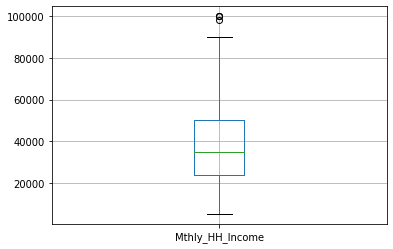

In [10]:
df1.boxplot('Mthly_HH_Income')

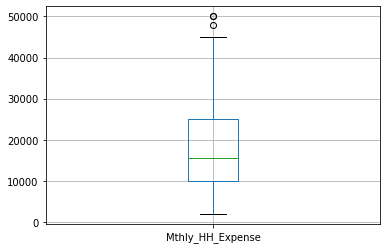

In [11]:
df1.boxplot('Mthly_HH_Expense')

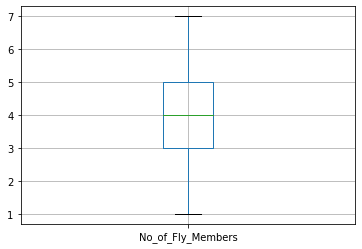

In [12]:
df1.boxplot('No_of_Fly_Members')

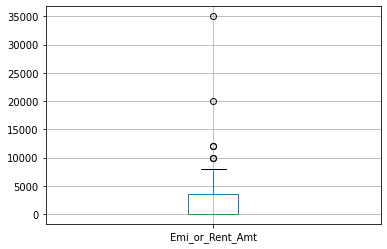

In [13]:
df1.boxplot('Emi_or_Rent_Amt')

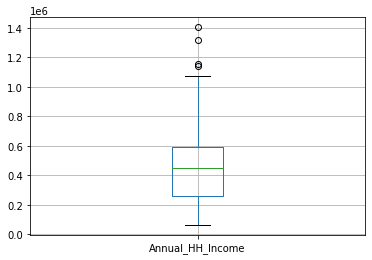

In [54]:
df1.boxplot('Annual_HH_Income')

  **Nhận xét:**

Các cột định lượng chứa giá trị ngoại lệ, bao gồm:

1) Mthly_HH_Income

2) Mthly_HH_Expense

3) No_of_Fly_Members	Emi_or_Rent_Amt

4) Annual_HH_Income
		

> **Bước 3**: Loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.

In [55]:
# Gộp các cột chứa giá trị ngoại lệ vào biến df2
df2 = pd.DataFrame(df, columns = ['Mthly_HH_Income' ,	'Mthly_HH_Expense' , 'No_of_Fly_Members' ,	'Emi_or_Rent_Amt' , 'Annual_HH_Income'])

In [56]:
# Thay thế các giá trị nan bằng giá trị trung bình của các cột 'Mthly_HH_Income' ,	'Mthly_HH_Expense' , 'No_of_Fly_Members' ,	'Emi_or_Rent_Amt'
colname_df2= df2.columns 
for i in colname_df2:
  df2[i] = df2[i].fillna(df2[i].mean())

In [57]:
# Sử dụng thư viện scipy để thực hiện tính toán giá trị zscore.
df2_zscore = np.abs(stats.zscore(df2))

# Loại bỏ giá trị ngoại biên
df2_zscore = df2[(df2_zscore < 3).all(axis=1)]

print(f"Dũe liệu sau khi được loại bỏ các giá trị ngoại biên:\n {df2_zscore}")


Dũe liệu sau khi được loại bỏ các giá trị ngoại biên:
     Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
7             18000             20000                  5             8000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000                  4             8000   
11            22000             25000                  6            12000   
12            23400  

> **Bước 4**: Tính toán các thông số cần thiết và vẽ biểu đồ sau khi loại bỏ các giá trị ngoại lệ

In [58]:
df2_zscore.describe() 

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
count,49.000000,49.000000,49.000000,49.000000,4.900000e+01
mean,42100.000000,18875.510204,4.081633,2408.163265,4.966031e+05
std,26082.489337,12208.595514,1.525297,4252.050326,3.200147e+05
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04
25%,24000.000000,10000.000000,3.000000,0.000000,2.610000e+05
50%,35000.000000,15000.000000,4.000000,0.000000,4.494000e+05
75%,50500.000000,25000.000000,5.000000,3500.000000,5.961600e+05
max,100000.000000,50000.000000,7.000000,20000.000000,1.404000e+06


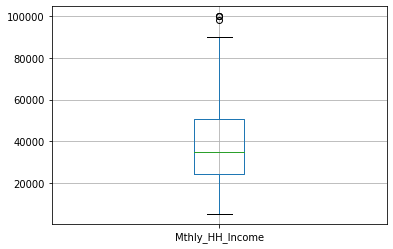

In [59]:
#Biểu đổ boxplot của cột Mthly_HH_Income sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Mthly_HH_Income')

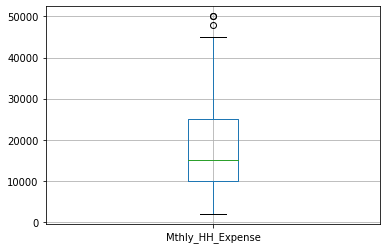

In [60]:
#Biểu đồ boxplot của cột Mthly_HH_Expense sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Mthly_HH_Expense')

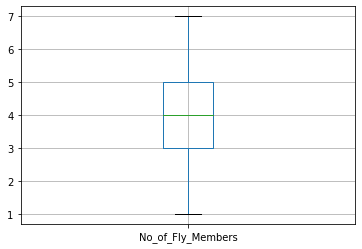

In [61]:
#Biểu đồ boxplot của cột No_of_Fly_Members sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('No_of_Fly_Members')

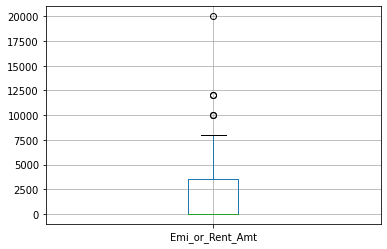

In [62]:
#Biểu đồ boxplot của cột Emi_or_Rent_Amt sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Emi_or_Rent_Amt')

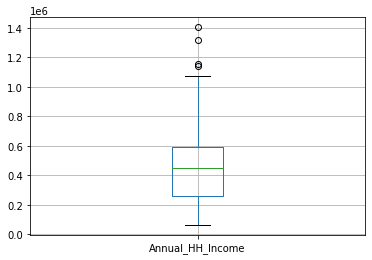

In [63]:
#Biểu đồ boxplot của cột Annual_HH_Income sau khi loại bỏ giá trị ngoại biên
df2_zscore.boxplot('Annual_HH_Income')

> **Bước 4**: Tính độ tương quan (correlation) giữa các cột định lượng.

In [64]:
corr_matrix = df1.corr()
print(corr_matrix)

                   Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  \
Mthly_HH_Income           1.000000          0.649215           0.448317   
Mthly_HH_Expense          0.649215          1.000000           0.639702   
No_of_Fly_Members         0.448317          0.639702           1.000000   
Emi_or_Rent_Amt           0.036976          0.405280           0.085808   
Annual_HH_Income          0.970315          0.591222           0.430868   

                   Emi_or_Rent_Amt  Annual_HH_Income  
Mthly_HH_Income           0.036976          0.970315  
Mthly_HH_Expense          0.405280          0.591222  
No_of_Fly_Members         0.085808          0.430868  
Emi_or_Rent_Amt           1.000000          0.002716  
Annual_HH_Income          0.002716          1.000000  


> **Bước 5**: Vẽ các biểu đồ cần thiết

1) Heat map (biểu đồ nhiệt)

2) Pair plot (biểu đồ cặp)

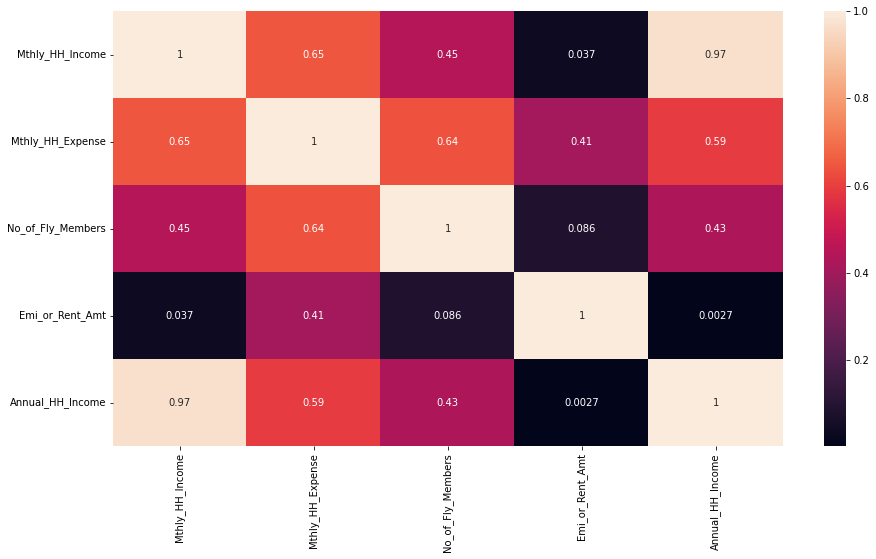

In [65]:
# Biểu đồ nhiệt từ bảng correlation (Heat map)
sns.heatmap(corr_matrix, annot=True)
plt.gcf().set_size_inches(15,8)

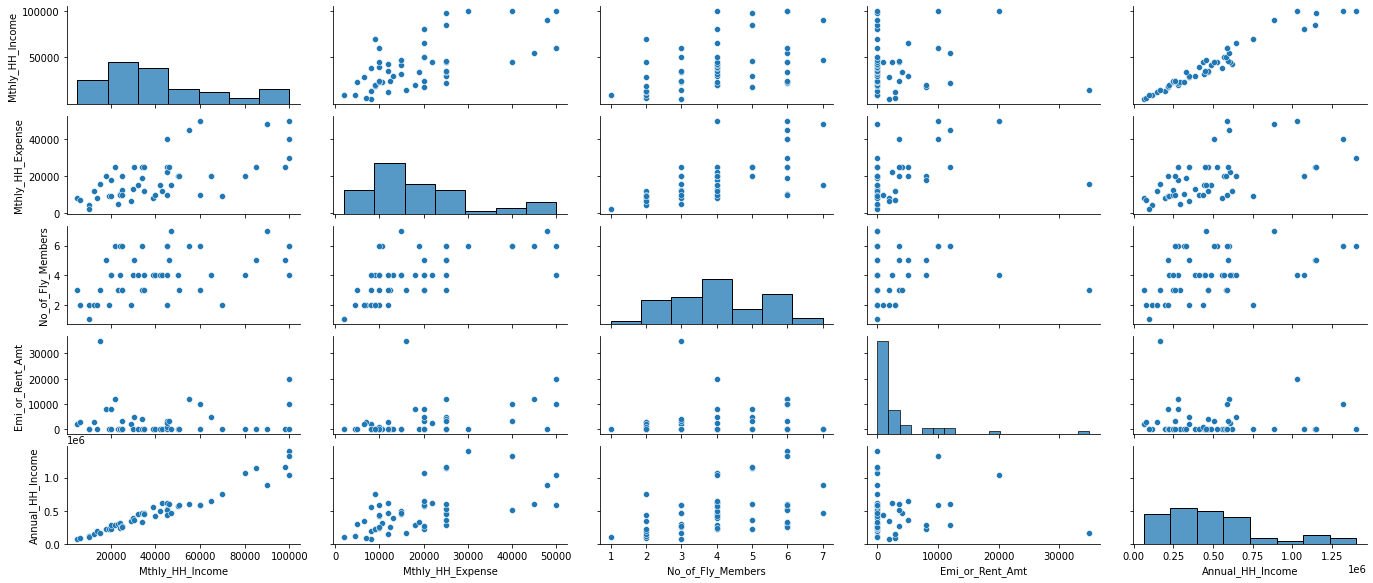

In [66]:
# Biểu đồ cặp từ bảng correlation (Pair plot)
sns.pairplot(df1)
plt.gcf().set_size_inches(20,8)

> **Bước 6**: Đối với các cột dữ liệu định tính, vẽ các biểu đồ:

1) Vẽ biểu đồ cột dạng đứng

2) Vẽ biểu đồ cột dạng ngang

3) Vẽ biểu đồ đường tròn

4) Vẽ biểu đồ Pareto

**Biểu đồ cột dạng đứng**

Đại diện: Cột Highest_Qualified_Member

<BarContainer object of 5 artists>

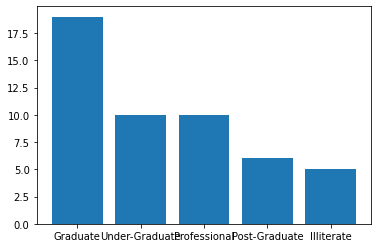

In [48]:
x = dict(df["Highest_Qualified_Member"].value_counts()).keys()
y = dict(df["Highest_Qualified_Member"].value_counts()).values()
plt.bar(x,y)

**Biểu đồ cột dạng ngang**

Đại diện: Cột Highest_Qualified_Member

<BarContainer object of 5 artists>

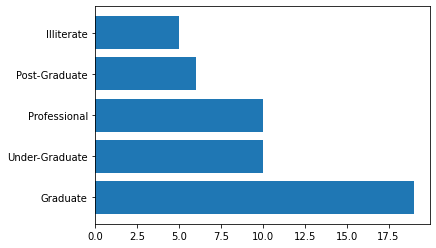

In [70]:
x = dict(df["Highest_Qualified_Member"].value_counts()).keys()
y = dict(df["Highest_Qualified_Member"].value_counts()).values()
plt.barh(list(x),list(y))

**Biểu đồ tròn**

Đại diện: Cột No_of_Earning_Members

In [68]:
bdtron = df['No_of_Earning_Members'].value_counts()
bdtron 

1    33
2    12
3     4
4     1
Name: No_of_Earning_Members, dtype: int64

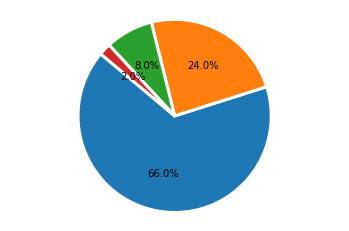

In [69]:
plt.pie(bdtron,
        autopct='%1.1f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        startangle=140)
plt.axis('equal')
plt.show()

**Biểu đồ đường Pareto**

Đại diện: No_of_Earning_Members

In [71]:
from matplotlib.ticker import PercentFormatter

In [72]:
count_enginetype = dict(df['No_of_Earning_Members'].value_counts()).values()

pareto_df = pd.DataFrame({'count':count_enginetype})
pareto_df.index = list(dict(df['No_of_Earning_Members'].value_counts()).keys())

pareto_df['cumperc'] = pareto_df['count'].cumsum()/pareto_df['count'].sum()*100
print(pareto_df)

   count  cumperc
1     33     66.0
2     12     90.0
3      4     98.0
4      1    100.0


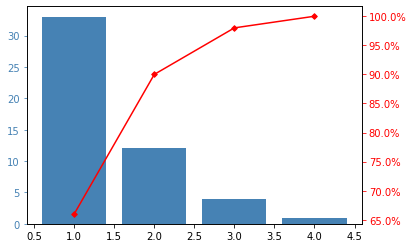

In [73]:
color1 = 'steelblue'
color2 = 'red'
line_size = 4

fig, ax = plt.subplots()
ax.bar(pareto_df.index, pareto_df['count'], color=color1)

ax2 = ax.twinx()
ax2.plot(pareto_df.index, pareto_df['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
plt.show()